# Introduction to GeoPandas

In this lesson, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.


<!--
Instructor Notes

Expected time to complete:
    Lecture + Questions: 30 minutes
    Exercises: 5 minutes
-->

## What is GeoPandas?

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past. GeoPandas is now the go-to package for working with `vector` geospatial data in Python. 

> **Protip**: If you work with `raster` data, check out the [rasterio](https://rasterio.readthedocs.io/en/latest/) package. We will not cover raster data in this tutorial.

GeoPandas gives you access to all of the functionality of [pandas](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data. So, if you're familiar with pandas, working with geospatial data is a natural next step.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install GeoPandas within this notebook:

In [1]:
# Install GeoPandas if you don't have it yet
%pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 9.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.4 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

### Read in a Shapefile

As we discussed in the initial geospatial overview, a *shapefile* is one type of geospatial data that holds vector data. 

> To learn more about ESRI Shapefiles, this is a good place to start: [ESRI Shapefile Wiki Page](https://en.wikipedia.org/wiki/Shapefile) 

The tricky thing to remember about shapefiles is that they're actually a collection of 3 to 9+ files together. Here's a list of all the files that can make up a shapefile:
 
* `shp`: The main file that stores the feature geometry
* `shx`: The index file that stores the index of the feature geometry  
* `dbf`: The dBASE table that stores the attribute information of features 
* `prj`: The file that stores the coordinate system information. (should be required!)
* `xml`: Metadata: Stores information about the shapefile.
* `cpg`: Specifies the code page for identifying the character set to be used.

But it remains the most commonly used file format for vector spatial data, and it's really easy to visualize in one go!

Let's try it out with California counties, and use GeoPandas for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we'll specify the `shp` file:

In [3]:
# Read in the counties shapefile
counties = gpd.read_file('../data/california_counties/CaliforniaCounties.shp')

<Axes: >

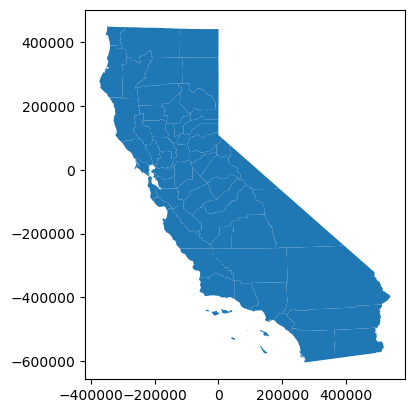

In [4]:
# Plot out California counties
counties.plot()

Bam! Amazing! We're off to a running start.

## Exploring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a *GeoDataFrame* is and how it's different from a pandas *DataFrame*.

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. Let's emphasize this point, because it's important:

> A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column.

This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame!

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [5]:
# Find the number of rows and columns in counties
counties.shape

(58, 59)

In [6]:
# Look at the first couple of rows in our geodataframe
counties.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,...,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,NaN,NaN,NaN,NaN,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,...,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,NaN,NaN,NaN,NaN,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,...,72.31,1329.46,06106,NaN,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,...,120.92,4720.42,06086,NaN,0,NaN,NaN,NaN,NaN,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,...,187.94,4087.19,06073,"San Bernardino,Kern",2874841,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."


In [7]:
# Look at all the variables included in our data
counties.columns

Index(['FID_', 'NAME', 'STATE_NAME', 'POP2010', 'POP10_SQMI', 'POP2012',
       'POP12_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI',
       'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5',
       'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
       'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS',
       'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
       'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07',
       'CROP_ACR07', 'AVG_SALE07', 'SQMI', 'CountyFIPS', 'NEIGHBORS',
       'PopNeigh', 'NEIGHBOR_1', 'PopNeigh_1', 'NEIGHBOR_2', 'PopNeigh_2',
       'geometry'],
      dtype='object')

It looks like we have a good amount of information about the total population for different years and the densities, as well as race, age, and occupancy info. Notice at the end - just like we promised - a geometry column containing many numbers. Let's explore what this means, next.

## Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column. What exactly does this column provide?

### GeoPandas Geometries

There are three main types of geometries that can be associated with your GeoDataFrame: points, lines and polygons.

<img src ="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="450"></img>

In the GeoDataFrame, these geometries are encoded in a format known as [Well-Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). Consider the following examples:

- POINT (30 10)
- LINESTRING (30 10, 10 30, 40 40)
- POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))

In each case, coordinates are separated by a spaces, and coordinate pairs are separated by commas.

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a GeoDataFrame of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

Note that, it's OK to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same GeoDataFrame.

---

### Challenge 1

What kind of geometry would a GeoDataFrame containing roads have? What about one that includes landmarks in the San Francisco Bay Area?

---

You can check the types of geometries in a GeoDataFrame or a subset of the GeoDataFrame by combining the `type` and `unique` methods:

In [8]:
# Let's check what geometries we have in our counties GeoDataFrame
counties['geometry'].head()

0    POLYGON ((193446.035 -244342.585, 194033.795 -...
1    POLYGON ((12524.028 -179431.328, 12358.142 -17...
2    MULTIPOLYGON (((-240632.150 93056.104, -240669...
3    POLYGON ((-45364.032 352060.633, -45248.844 35...
4    MULTIPOLYGON (((173874.519 -471855.293, 173852...
Name: geometry, dtype: geometry

In [9]:
# Let's check to make sure that we only have polygons and multipolygons 
counties['geometry'].type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

<Axes: >

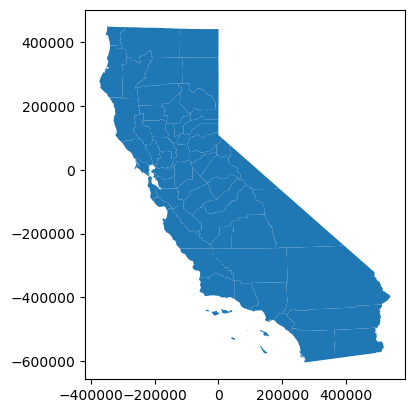

In [10]:
counties.plot()

Just like with other plots you can make in Python, we can start customizing our map with colors, size, etc.

In [11]:
# We can run the following line of code to get more info about the parameters we can specify:
?counties.plot

Signature:      counties.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x154ae9150>
File:           ~/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series (default None)
    The name of the dataframe column, np.array, or pd.Series to be plotted.
    If np.array or pd.Series are used then it must have same length as
    dataframe. Values are used to color the plot. Ignored if `color` is
    also set.
kind: str
    The kind of plots to produce. The default is to create a map ("geo").
    Other supported kinds of plots from pandas:

    - 'line' : line plot
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : BoxPlot
    - 'kde' : Ke

<Axes: >

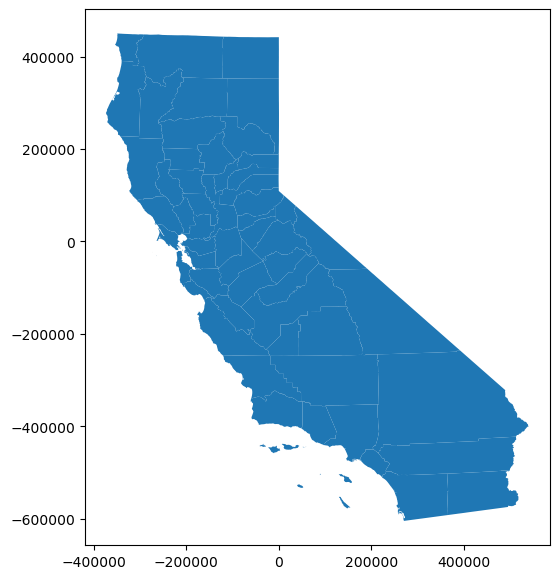

In [12]:
# Make the figure size bigger
counties.plot(figsize=(6, 9))

<Axes: >

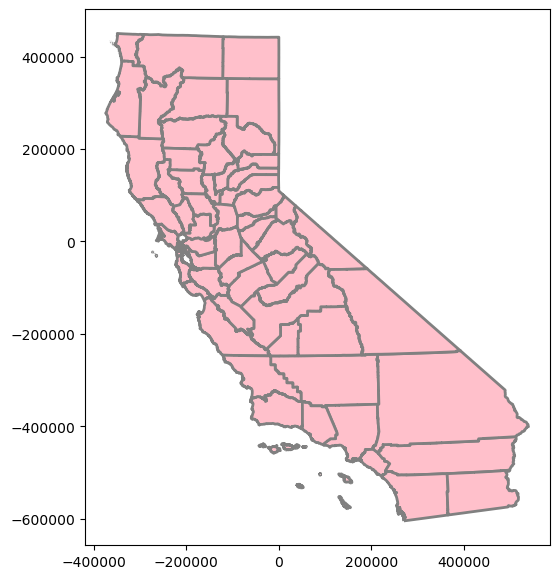

In [13]:
# Customize our plot further
counties.plot(figsize=(6, 9), 
              edgecolor='grey', # Grey colored border lines
              facecolor='pink', # Fill in our counties as pink
              linewidth=2)      # Make the linewidth larger

## Subset the GeoDataframe

Since we'll be focusing on Berkeley later in the workshop, let's subset Alameda County from our GeoDataFrame:

In [14]:
# See all county names included in our dataset
counties['NAME'].values

array(['Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera',
       'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino',
       'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Alameda', 'Alpine',
       'Sonoma', 'Amador', 'Stanislaus', 'Sutter', 'Butte', 'Calaveras',
       'Tehama', 'Colusa', 'Trinity', 'Tulare', 'Contra Costa',
       'Del Norte', 'Tuolumne', 'Ventura', 'El Dorado', 'Yolo', 'Fresno',
       'Glenn', 'Yuba', 'Humboldt', 'Imperial', 'Inyo'], dtype=object)

It looks like Alameda county is specified as "Alameda" in this dataset.

So, let's create a new GeoDataFrame called `alameda_county` that is a subset of our counties GeoDataFrame:

In [15]:
alameda_county = counties.loc[counties['NAME'] == 'Alameda'].copy().reset_index(drop=True)

In [16]:
alameda_county

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Alameda,California,1510271,2029.8,1534551,2062.402226,649122,190451,9799,...,95.92,744.06,06068,NaN,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-197580.800 -24065.060, -19763..."


<Axes: >

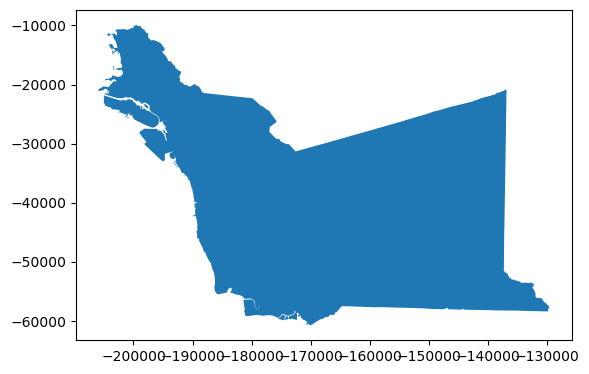

In [17]:
# Plot our newly subsetted GeoDataFrame
alameda_county.plot()

Nice! Looks like we have what we were looking for.

You can also make dynamic plots of one or more county without saving to a new GeoDataFrame:

<Axes: >

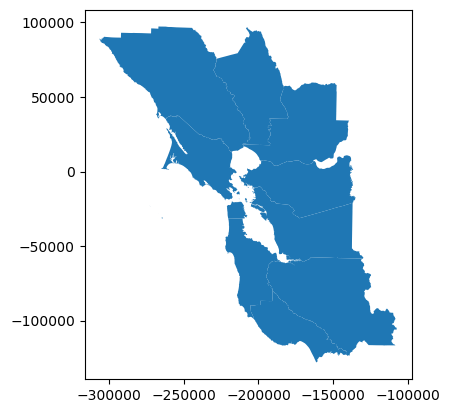

In [18]:
bay_area_counties = ['Alameda',
                     'Contra Costa',
                     'Marin',
                     'Napa',
                     'San Francisco', 
                     'San Mateo',
                     'Santa Clara',
                     'Santa Cruz',
                     'Solano',
                     'Sonoma']
counties.loc[counties['NAME'].isin(bay_area_counties)].plot()

## Save Your Data

Let's not forget to save out our Alameda County geodataframe `alameda_county`. This way we won't need to repeat the processing steps and attribute join we did above.

We can save it as a shapefile:

In [19]:
alameda_county.to_file("../data/outdata/alameda_county.shp")

One of the problems of saving to a shapefile is that our column names get truncated to 10 characters (this is a shapefile limitation). 

Instead of renaming all columns with obscure names that are less than 10 characters, we can save our GeoDataFrame to spatial data file formats that do not have this limation, such as [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) or [GPKG](https://en.wikipedia.org/wiki/GeoPackage) (geopackage) files.

These formats have the added benefit of outputting only one file in contrast to the multi-file shapefile format.

In [20]:
alameda_county.to_file("../data/outdata/alameda_county.json", driver="GeoJSON")

In [21]:
alameda_county.to_file("../data/outdata/alameda_county.gpkg", driver="GPKG")

You can read these in, just as you would a shapefile with `gpd.read_file`:

<Axes: >

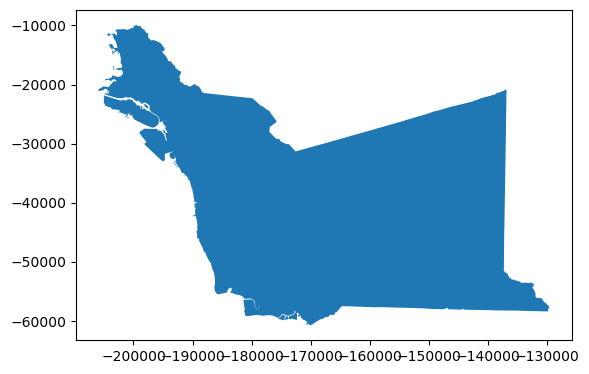

In [22]:
alameda_county_test2 = gpd.read_file("../data/outdata/alameda_county.json")
alameda_county_test2.plot()

<Axes: >

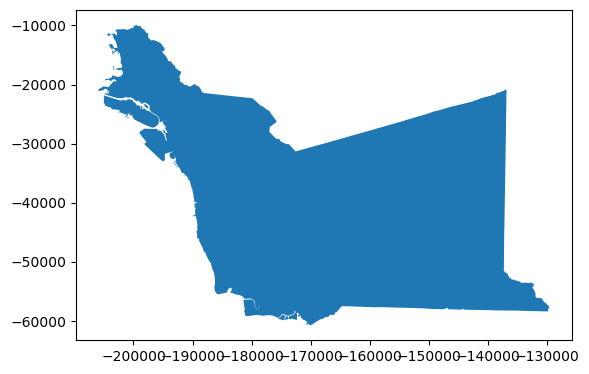

In [23]:
alameda_county_test = gpd.read_file("../data/outdata/alameda_county.gpkg")
alameda_county_test.plot()

There are also many other formats we could use for data output.

**NOTE**: If you're working with point data (i.e. a single latitude and longitude value per feature),
then CSV might be a good option!

## Overview

In this lesson, we learned about:

- The `geopandas` package
- Reading in shapefiles
    - `gpd.read_file`
- GeoDataFrame structures
    - `shape`, `head`, `columns`
- Plotting GeoDataFrames
    - `plot`
- Subsetting GeoDatFrames
    - `loc`
- Saving out GeoDataFrames
    - `to_file`

---

### Challenge 2: IO, Manipulation, and Mapping

Now, you'll get a chance to practice the operations we learned above.

In the following cell, compose code to:

1. Read in the California places data (`../data/census/Places/cb_2018_06_place_500k.zip`).
2. Subset "Berkeley" from the data.
3. Plot, and customize as desired.
4. Save out as a shapefile (`berkeley_places.shp`).

*Note: pulling in a zipped shapefile has the same syntax as just pulling in a shapefile. The only difference is that insead of just putting in the filepath, you'll want to write `zip://../data/census/Places/cb_2018_06_place_500k.zip`*

---

In [24]:
# Read in the California places data
california_places = gpd.read_file('zip://../data/census/Places/cb_2018_06_place_500k.zip')
california_places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,46492,02411054,1600000US0646492,0646492,Maywood,25,3052102,0,"POLYGON ((-118.20416 33.98952, -118.20433 33.9..."
1,06,17750,02410282,1600000US0617750,0617750,Cypress,25,17127728,21850,"POLYGON ((-118.06332 33.83153, -118.06123 33.8..."
2,06,56938,02411418,1600000US0656938,0656938,Piedmont,25,4402167,0,"POLYGON ((-122.24930 37.82372, -122.24812 37.8..."
3,06,69088,02411819,1600000US0669088,0669088,Santa Clarita,25,170638259,162849,"MULTIPOLYGON (((-118.56481 34.35969, -118.5591..."
4,06,13392,02409461,1600000US0613392,0613392,Chula Vista,25,128547314,6380537,"POLYGON ((-117.12399 32.64636, -117.11707 32.6..."


In [25]:
# Subset Berkeley from data
berkeley_subset = california_places[california_places['NAME'] == 'Berkeley'].copy().reset_index(drop=True)
berkeley_subset.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,06000,02409837,1600000US0606000,0606000,Berkeley,25,27127391,18715614,"POLYGON ((-122.32519 37.87428, -122.31866 37.8..."


<Axes: >

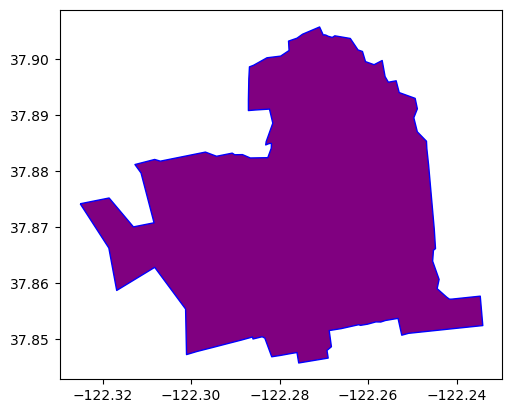

In [31]:
# Plot
berkeley_subset.plot(edgecolor='blue', color='purple')

In [37]:
# Save to shapefile
berkeley_subset.to_file("../lessons/shapefile/berkeley_places.shp")